
<p style="text-align: center;"><font size=6>Курсовая работа<Big></font>
    
<p style="text-align: center;"><font size=5>Формирование контура управления зенитной ракетой.<Big></font>
<p style="text-align: center;"><font size=3><i>Хромов Алексей 715а гр.<i><Big></font>



































##  Постановка задачи.
Передаточная функция от команды управления к ускорению имеет вид:

$$\begin{aligned}
W_\text{кст}(s)=\frac{1}{1+2\xi T_\text{кст}s+T^2_\text{кст}s^2},
\end{aligned}$$

где $T_\text{кст}=0,1\cdot N[\text{с}]$; $\xi=0,7$; $N = 8$(номер в журнале).

Основной критерий: максимальное быстродейтсвие контура управвления. Требуется определить:

1. Принципиальную структурную схему замкнутого контура.
2. Передаточные функции разомкнутого и закнутого контуров управления. Астатизм контура. Характеристические частоты.
3. Коэффициенты ошибок: $\text{с}_0$, $\text{с}_1$, $\text{с}_2$, $\text{с}_3$.
4. Логарифмические частотные характеристики  разомкнутоого и замкнутого контуров. Запасы по фазе и амплитутде. Частоту среза. Показатель колебтельности.
5. Эффективную полосу пропускания.
6. Переходный процесс и весовую функцию. Характеристики переходного процесса.

##  Отчёт.
### 1. Принципиальная структурная схема замкнутого контура.

<img src="https://raw.githubusercontent.com/dart9905/EDU/master/Sem7/coursework/1.png" alt="https://raw.githubusercontent.com/dart9905/EDU/master/Sem7/coursework/1.png" width="500">
<p style="text-align: center;"><font size=2>Рис. 1. График траектори полёта ракеты от точки старта до точки встречи.<Big></font>

$\overrightarrow{V}_\text{ц}$ - скорость цели; $\overrightarrow{V}_\text{р}$ - скорость ракеты; ТВ - точка встречи.

Для составления принципиальной схемы контура, воспользуемся вторым законом Ньютона, регулирующее поведение полёта объекта. На уровне схем в нашей модели будут присутствовать функция упраления (Колебательное звено):

$$\begin{aligned}
W_\text{кст}(s)=\frac{1}{1+2\xi T_\text{кст}s+T^2_\text{кст}s^2},
\end{aligned}$$

форсирующее звено:


$$\begin{aligned}
W_\text{фор}(s)=k\cdot(1+Ts),
\end{aligned}$$

и обратная связь, включающая в себя кинематическое звено:

$$\begin{aligned}
W_\text{кин}(s)=\frac{1}{s^2}.
\end{aligned}$$

<img src="https://raw.githubusercontent.com/dart9905/EDU/master/Sem7/coursework/2.png" alt="https://raw.githubusercontent.com/dart9905/EDU/master/Sem7/coursework/2.png" width="900">
<p style="text-align: center;"><font size=2>Рис. 2. Принципиальная структурная схема замкнутого контура.<Big></font>

Для дальнейших вычислений напишим модели наших звеньев:

In [3]:
# standard imports\n",
import os
import random
import numpy as np
import math

import matplotlib.pyplot as plt
%matplotlib inline

default_dpi = plt.rcParamsDefault['figure.dpi']
plt.rcParams['figure.dpi'] = default_dpi*1.6

PI = math.pi

In [4]:
xi = 0.7
N = 8
T_osc = 0.1 * N

def W_osc(s): #oscillating element
    return 1/(1+2*xi*T_osc*s+(T_osc**2)*(s**2))

def W_forc(s, k, T): #the forcing element
    return k*(1+T*s)

def W_kin(s): #the kinematic element
    return 1/(s**2)

### 2. Передаточные функции разомкнутого и закнутого контуров управления. Астатизм контура. Характеристические частоты.

По свойствам передаточных функий наша, для разомкнтуого контура, имеет вид:

$$\begin{aligned}
W(s)=W_\text{кст}(s)\cdot W_\text{фор}(s)\cdot W_\text{кин}(s)=\frac{1}{1+2\xi T_\text{кст}s+T^2_\text{кст}s^2}\cdot k\cdot(1+Ts) \cdot \frac{1}{s^2}.
\end{aligned}$$

Для замкнутого контура:


$$\begin{aligned}
W_k(s)=\frac{W(s)}{1+W(s)}=\frac{k(1+Ts)}{k(1+Ts)+s^2+2\xi T_\text{кст} s^3+T^2_\text{кст}s^4}
\end{aligned}$$

Из $W_\text{кин}(s)\Rightarrow$ **астатизм второго порядка** передаточной функции контура управления.

Характеристическая частота: $$\frac{1}{T_\text{кин}}= 1,25\,\frac{\text{рад}}{\text{сек}}.$$


In [5]:
print(1/T_osc, 'rad/sec')

1.25 rad/sec


In [6]:
def W(s, k, T):
    return W_osc(s)*W_forc(s, k, T)*W_kin(s)

def W_k(s, k, T):
    return W(s, k, T)/(1+W(s, k, T))

### 3. Коэффициенты ошибок: $C_0$, $C_1$, $C_2$, $C_3$.


$$\begin{aligned}
W_{\Delta\varepsilon}(s)=\frac{1}{1+W(s)};
\end{aligned}$$

$$\begin{aligned}
\Delta\varepsilon(t)=\int\limits_0^\infty K_{\Delta\varepsilon}(t)g(t-\tau)\,d\tau;\qquad
W_{\Delta\varepsilon}(s)=\int\limits_0^\infty K_{\Delta\varepsilon}(t)e^{-st}\,dt;
\end{aligned}$$
 
$$g(t-\tau)=g(t)-\dot{g}(t)\tau+\frac1{2!}\ddot{g}(t)\tau^2;$$.

$$\Delta\varepsilon(t)=g(t)\int\limits_0^\infty K_{\Delta\varepsilon}(\tau)\,d\tau
-\dot{g}(t)\int\limits_0^\infty K_{\Delta\varepsilon}(\tau)\tau\,d\tau
+\frac1{2!}\ddot{g}(t)\int\limits_0^\infty K_{\Delta\varepsilon}(\tau)\tau^2\,d\tau=
C_1g(t)+C_2\dot{g}(t)-\frac{C_3}{2!}\ddot{g}(t);$$

$$C_0=W_{\Delta\varepsilon}(s)\bigg|_{s=0}=\frac{1}{1+W(s)}\bigg|_{s=0}=0;$$



$$C_1=\frac{d W_{\Delta\varepsilon}(s)}{d s}\bigg|_{s=0}=-\frac{1}{(1+W(s))^2}\cdot\frac{dW_{\Delta\varepsilon}(s)}{ds}\bigg|_{s=0}=0\,\frac{\text{сек}}{\text{рад}}.$$

То что $C_0=C_1=0$ следствие обратной интегральной связи, астатизма второго порядка.

$$C_2=\frac{d^2 W_{\Delta\varepsilon}(s)}{d s^2}\bigg|_{s=0}=\frac2k;$$

$$C_3=\frac{d^3 W_{\Delta\varepsilon}(s)}{d s^3}\bigg|_{s=0}=\frac{2\xi T_\text{кст}-2T}{k}.$$

Из пункта 4, где мы нашли $T$ и $k$:

$$C_2 = 16\,\frac{\text{сек}^2}{\text{рад}^2}.$$


In [13]:
'''
Warning: run the code only after finding the required values!!!
'''
print('C_2 = ', 2/k*100//1/100,'(sec^2)/(rad^2)')

C_2 =  16.0 (sec^2)/(rad^2)


$$C_3 = -55,05\,\frac{\text{сек}^3}{\text{рад}^3}.$$

In [14]:
'''
Warning: run the code only after finding the required values!!!
'''
print('C_3 = ', (2*xi*T_osc-2*T)/k*100//1/100,'(sec^3)/(rad^3)')

C_3 =  -55.05 (sec^3)/(rad^3)


### 4. Логарифмические частотные характеристики  разомкнутого и замкнутого контуров. Запасы по фазе и амплитутде. Частоту среза. Показатель колебтельности.

Построим логарифмическую частотную характеристику для разомкнтудого контура:

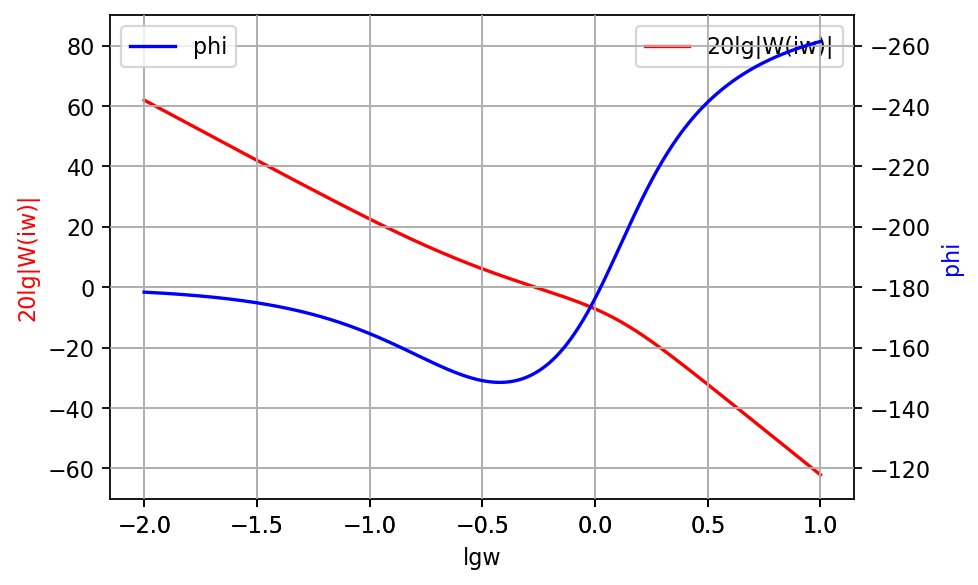

In [15]:
'''
Warning: run the code only after finding the required values!!!
'''
w =[]
data_W_abs = []
data_W_arg = []
for i in range(100000):
    w.append(math.log10((i+100)/10000))
    data_W = W(complex(0, (i+100)/10000), k, T)
    data_W_abs.append(20*math.log10(abs(data_W)))
    data_W_arg.append(math.atan(data_W.imag/data_W.real)*180/PI-180)


fig=plt.figure()

#fig.title('Logarithmic-frequency characteristics')
ax1=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)


ax1.plot(w, data_W_abs, label = u'20lg|W(iw)|', color="r")
ax1.set_xlabel("lgw")
ax1.set_ylabel("20lg|W(iw)|", color="r")
ax1.tick_params(axis='x')
ax1.tick_params(axis='y')
ax1.set_ylim(-70,90)
ax1.grid(True)
ax1.legend()

ax2.plot(w, data_W_arg, label = u'phi', color="b")
ax2.yaxis.tick_right()
ax2.set_ylabel('phi', color="b")    
ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='y')
ax2.set_ylim(-270,-110)
ax2.invert_yaxis() 
ax2.grid(True)
ax2.legend()




plt.show()

1. Из повторного интегрирования в кинематическом звене $\Rightarrow$ $-\pi/2-\pi/2=-\pi$ -  начало графика частот;
2. Далее форсирующее звено вносит вклад $+\pi/2$;
3. В конце колебательное звено даёт $-\pi$ - итог $-3\pi/2$.


Характеристическая частота контура стабилизации:

$$w_\text{кст}=1,25\,\frac{\text{рад}}{\text{сек}}.$$

In [402]:
print(1/T_osc, 'rad/sec')

1.25 Hz


Частота среза и параметры форсирующего звена:

$$w_\text{ср} = \frac{1}{2sT_\text{кст}}\Rightarrow\,T=\frac2w_\text{ср}=2T_\text{ср};$$

$$\frac{k}{w^2_\text{ср}Tw_\text{ср}}\approx1;\qquad\qquad k=\frac{w_\text{ср}}{T};$$

$$W(s)=\frac{1}{s^2}k(1+Ts)\,\,\Rightarrow\,\,|W(w)|=\frac1{w^2}\sqrt{1+w^2T^2}; $$

$$T=5T_\text{кст} =4 \text{ c};\qquad\qquad k=\frac1{12,5*T_\text{кст}^2}=0,125 \,\frac{\text{рад}}{\text{сек}^2};\qquad\qquad w_\text{ср} =\frac2T=0,5\,\frac{\text{рад}}{\text{сек}}.$$

In [17]:
'''
now you can run the code above
'''
T = 5*T_osc
k = 1/(12.5*T_osc**2)
w_cut = 2/T#cutoff frequency
print('T =',T*100//1/100,'sec')
print('k =',k*100//1/100,'rad/sec^2')
print('w_cut =',w_cut*100//1/100,'rad/sec')

T = 4.0 sec
k = 0.12 rad/sec^2
w_cut = 0.5 rad/sec


Найдём запас по фазе. Для этого посчитаем сдвиг форсирующего звена:

$$\Delta\psi_\text{фр}=\arctan w_\text{ср}T = 63,43^\circ.$$

Для колебательного звена:

$$\Delta\psi_\text{кст}=\arctan \frac{2\xi T_\text{кст}w_\text{ср}}{1-w_\text{ср}^2T_\text{кст} ^2} = 33,69^\circ.$$

Тогда запас по фазе для контура управления:

$$\Delta\psi_\text{ку}=\Delta\psi_\text{фр}-\Delta\psi_\text{кст}=29,74^\circ.$$

Мы достигли минимума значения - порога принятого на практике $\Delta\psi_\text{ку}\in[30^\circ;60^\circ]$.

In [18]:
psi_forc = math.atan(w_cut*T)*180/PI
psi_osc  = math.atan((2*xi*T_osc*w_cut)/(1-w_cut**2*T_osc**2))*180/PI
psi = psi_forc - psi_osc
print('psi_forc =',psi_forc*100//1/100,'°')
print('psi_osc =' ,psi_osc*100//1/100,'°')
print('psi ='     ,psi*100//1/100,'°')

psi_forc = 63.43 °
psi_osc = 33.69 °
psi = 29.74 °


$$\Delta\psi_\text{фр}(w_\text{ср})=-\Delta\psi_\text{кст}(w_\text{кр})\qquad\Rightarrow\qquad w_\text{кр}=\frac{\sqrt{1-2\xi T_\text{кст}/T}}{T}=0,212\,\frac{\text{рад}}{\text{сек}};$$

Запас по амплитуде:

$$\Delta A_\text{з} = -20 \lg\frac{k}{w^2_\text{кр}}\sqrt{\frac{1+w^2_\text{кр}T^2}{(1-w^2_\text{кр}T_\text{кст}^2)^2+(2\xi T_\text{кст} w_\text{кр})^2}}= -11,24\text{ дБ}.$$

На практике значение запаса по амплитуде $\Delta A_\text{з}\in[6;20]$ дБ.

In [20]:
w_cr = math.sqrt(1-2*xi*T_osc/T)/T#critical frequency
A_amp = -20* math.log10(k/(w_cr**2)*math.sqrt(
    (1+w_cr**2*T**2)/
    ((1-w_cr**2*T_osc**2)**2+(2*xi*T_osc*w_cr)**2)))#amplitude margin
print('w_cr =',w_cr*1000//1/1000,'rad/sec')
print('A_amp = ', A_amp*100//1/100,'dB')

w_cr = 0.212 rad/sec
A_amp =  -11.24 dB


Посчитаем показатель колебательности для контура управления. Для этого построим АЧХ замкнутого контура управления.

$$A(w)=\bigg|\frac{W(iw)}{1+W(iw)}\bigg|=|W_k(iw)|.$$

max A = 2.03 dB


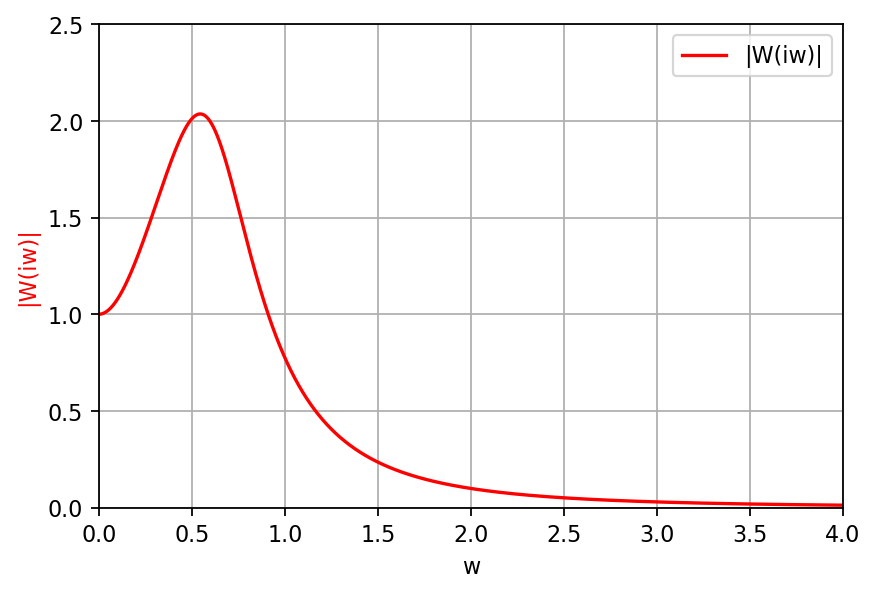

In [21]:
w =[]
data_W_k_abs = []
max_W_k_abs=0

for i in range(100000):
    w.append((i+1)/10000)
    data_W_k = abs(W_k(complex(0, (i+1)/10000), k, T))
    data_W_k_abs.append(data_W_k)
    if data_W_k>max_W_k_abs:
        max_W_k_abs = data_W_k

print('max A =',max_W_k_abs*100//1/100,'dB')
    
fig2=plt.figure()

#fig.title('Logarithmic-frequency characteristics')
ax1=fig2.add_subplot(111, label="1")


ax1.plot(w, data_W_k_abs, label = u'|W(iw)|', color="r")
ax1.set_xlabel("w")
ax1.set_ylabel("|W(iw)|", color="r")
ax1.tick_params(axis='x')
ax1.tick_params(axis='y')
ax1.set_xlim(0,4)
ax1.set_ylim(0,2.5)
ax1.grid(True)
ax1.legend()


plt.show()

Из графика $A_\max\approx2$. Показатель колебательности:

$$M=\frac{A_\max}{A(0)}\approx\frac21=2.$$


Это намного выше рекомендуемого граничного значения колебательнности для контура управления. Должно быть $M<1,3-1,7$.
Так как технически на практике элементы колебательного звена трудно заменимы, будем регулировать форсирующее звено.
Для любых парметров $k$ и $T$ нашего форсирущего звена верно, что $A(0)=1$. Так что $M = |A_\max|$.

Исследуем зависимость $A_\max(T)$ и $A_\max(k)$, где $T$, $k$ - парметры нашего форсирующего звена.

Для начала найдем все максимумы при варьировании $T$, и построим график $A_\max(T)$, чтобы пронаблюдать зависимость. Если мы найдём какие-то $T$, при которых $A_\max(T)$ меньше наших порогов, то выведем эти значения.

min M =  2.0100608088252883 T =  4.3


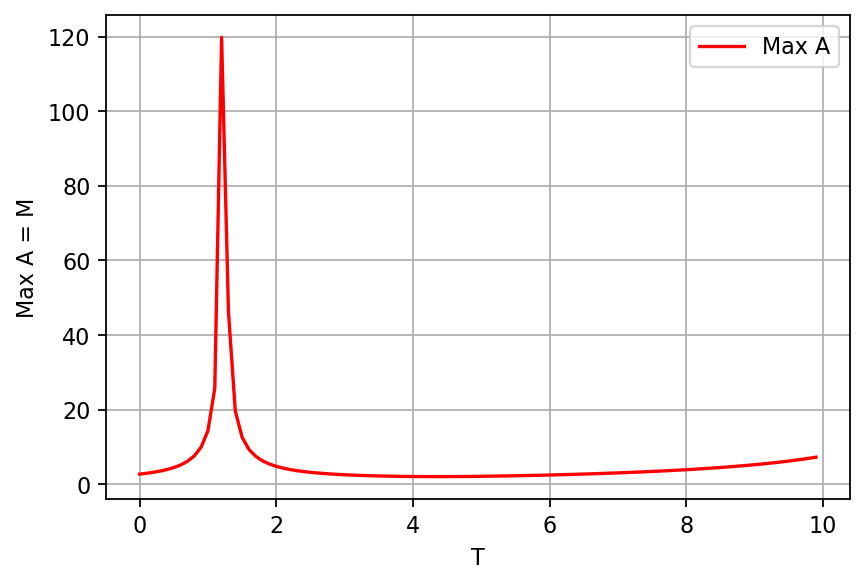

In [22]:
limit_M1 = 1.7
limit_M2 = 1.3
max_W_k_abs=0
data_max_W_k_abs = []
data_var_T = []
min_max_W_k_abs = 10
T_save = 0

for var_T in range(100):
    max_W_k_abs=0
    
    for i in range(100000):
        data_W_k = abs(W_k(complex(0, (i+1)/10000), k, var_T/10))
        if data_W_k>max_W_k_abs:
            max_W_k_abs = data_W_k
            
    data_max_W_k_abs.append(max_W_k_abs)
    data_var_T.append(var_T/10)
    
    if min_max_W_k_abs > max_W_k_abs:
        min_max_W_k_abs = max_W_k_abs
        T_save = var_T/10
        
    if max_W_k_abs < limit_M2:
        print('M = max_W_k_abs',max_W_k_abs,'var_T = ', var_T/10,'sec')
    else:
        if max_W_k_abs < limit_M1:
            print('M = max_W_k_abs',max_W_k_abs,'var_T = ', var_T/10,'sec')
            
            
print('min M = ', min_max_W_k_abs, 'T = ', T_save)
plt.ylabel('Max A = M')
plt.xlabel('T')
plt.plot(data_var_T, data_max_W_k_abs, label = u'Max A', color = 'r')
plt.legend()
plt.grid(True)
plt.show()
    
    

Мы видим, что варьирование параметра $T$ не улучшило ситуации, что минимальныое значение показателя колебательности равно $2,01$ при  $T = 4,3$ с. Заметим, что наше расчетное значение $T = 4,0$ с, то есть мы можем улучшить значение $M$ изменив наш параметр $T$ до $4,3$ с.

Теперь будем изменять $k$ и построим зависимость $|A_\max(k)|$:

M = max_W_k_abs 0.0 var_k =  0.0 rad/sec^2
M = max_W_k_abs 1.29 var_k =  4.1 rad/sec^2
M = max_W_k_abs 1.29 var_k =  4.2 rad/sec^2
M = max_W_k_abs 1.28 var_k =  4.3 rad/sec^2
M = max_W_k_abs 1.28 var_k =  4.4 rad/sec^2
M = max_W_k_abs 1.27 var_k =  4.5 rad/sec^2
M = max_W_k_abs 1.27 var_k =  4.6 rad/sec^2
M = max_W_k_abs 1.26 var_k =  4.7 rad/sec^2
M = max_W_k_abs 1.26 var_k =  4.8 rad/sec^2
M = max_W_k_abs 1.26 var_k =  4.9 rad/sec^2


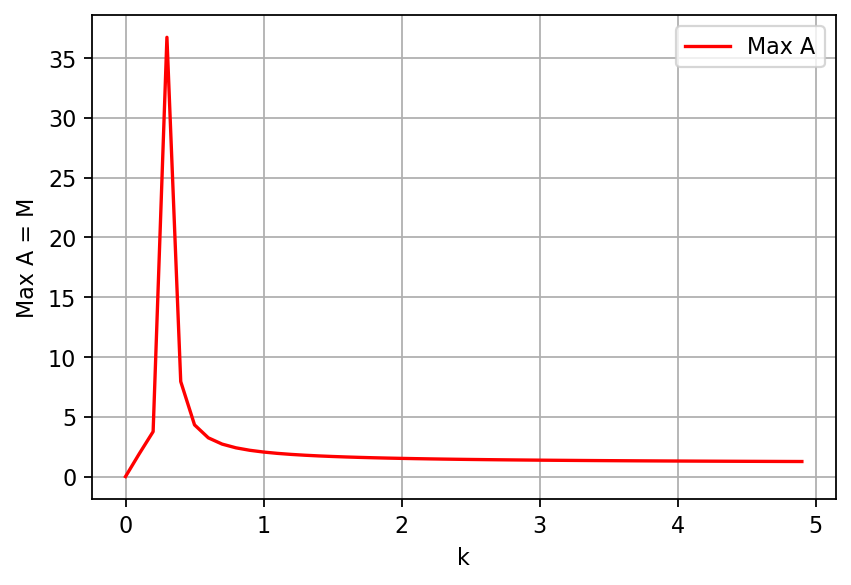

In [24]:
max_W_k_abs=0
data_max_W_k_abs = []
data_var_k = []

for var_k in range(50):
    max_W_k_abs=0
    for i in range(100000):
        data_W_k = abs(W_k(complex(0, (i+1)/10000), var_k/10, T))
        if data_W_k>max_W_k_abs:
            max_W_k_abs = data_W_k
    data_max_W_k_abs.append(max_W_k_abs)
    data_var_k.append(var_k/10)
    if max_W_k_abs < limit_M2:
        print('M = max_W_k_abs',max_W_k_abs*100//1/100,'var_k = ', var_k/10,'rad/sec^2')
#     else:
#         if max_W_k_abs < limit_M1:
#             print('M = max_W_k_abs',max_W_k_abs,'var_k = ', var_k/10,'rad/sec^2')

plt.ylabel('Max A = M')
plt.xlabel('k')
plt.plot(data_var_k, data_max_W_k_abs, label = u'Max A', color = 'r')
plt.legend()
plt.grid(True)
plt.show()

Моделирование показало нам, что начиная с $k = 4,1\frac{\text{рад}}{\text{сек}^2}$ значение $M < 1,3$ и продолжает убывать с ростом $k$. Например:

$$M = 1.29;\qquad k = 4,1\frac{\text{рад}}{\text{сек}^2};$$

$$M = 1.28;\qquad k = 4,3\frac{\text{рад}}{\text{сек}^2};$$

$$M = 1.27;\qquad k = 4,5\frac{\text{рад}}{\text{сек}^2};$$

$$...$$

### 5. Эффективная полоса пропускания.

Формула ширины полосы пропускания:
$$w_\text{эф} = \int\limits_0^\infty \frac{|W(iw)|^2}{W^2(0)}\,dw;$$

В нашем случае $W^2(0) = 1:$
$$w_\text{эф} = \int\limits_0^\infty|W(iw)|^2\,dw;$$


w = 0.911 rad/sec


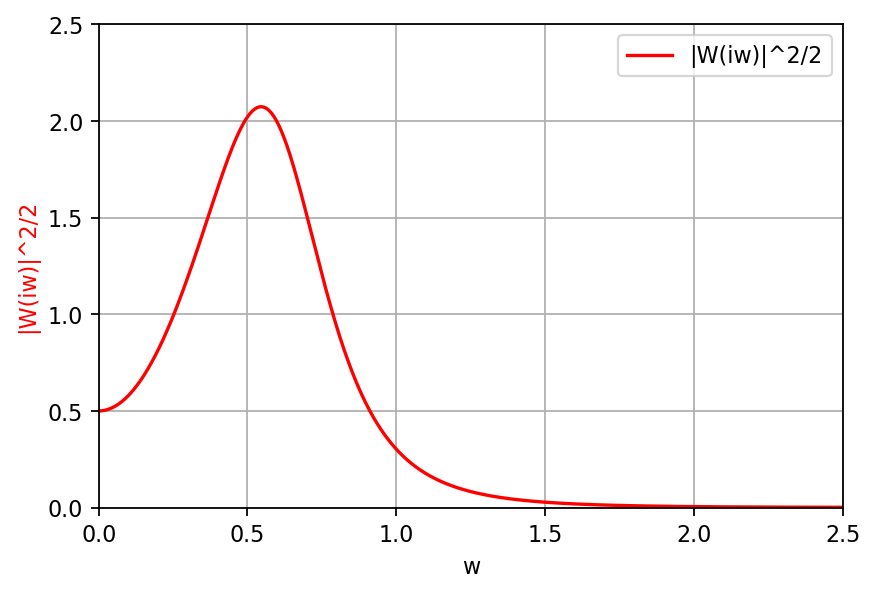

In [26]:
w =[]
data_W_k_abs = []
key = 1
for i in range(100000):
    w.append((i+1)/10000)
    data_W_k = abs(W_k(complex(0, (i+1)/10000), k, T))**2/2
    data_W_k_abs.append(data_W_k)
    if (data_W_k < 0.5)&(key):
        print('w =',(i+1)/10000*1000//1/1000,'rad/sec')
        key = 0

    
fig2=plt.figure()

#fig.title('Logarithmic-frequency characteristics')
ax1=fig2.add_subplot(111, label="1")


ax1.plot(w, data_W_k_abs, label = u'|W(iw)|^2/2', color="r")
ax1.set_xlabel("w")
ax1.set_ylabel("|W(iw)|^2/2", color="r")
ax1.tick_params(axis='x')
ax1.tick_params(axis='y')
ax1.set_xlim(0,2.5)
ax1.set_ylim(0,2.5)
ax1.grid(True)
ax1.legend()


plt.show()

Эффективная полоса пропускания определняется по графику $w_\text{эф} = 0,911\,\frac{\text{рад}}{\text{сек}}.$ 

### 6. Переходный процесс и весовая функция. Характеристики переходного процесса.
Для нахождения $K(t)$ - весовой функции, подадим на вход дельта импульс $\delta(t)$.

$$K(t)=\int\limits_0^tK(t)\delta(t-\tau)\,d\tau=\frac1{2\pi i}\int\limits_{c-iw}^{c+iw}W_k(s)e^{st}\,ds.$$

Смоделируем процесс. Для начала рассмотрим передаточные функции и дифференциальные уравнения, которым они соотвествуют.
Интегрирующее звено обратной связи:

$$W_\text{кин}(s)=\frac{1}{s}\qquad\Rightarrow\qquad 
\frac{dU_{out}(t)}{dt}=U_{in}(t)\qquad\Rightarrow\qquad 
U_{out}(t)=\int\limits_0^tU_{int}(\tau)\,d\tau;$$

тогда для

$$W_\text{кин}(s)=\frac{1}{s^2}\qquad\Rightarrow\qquad 
\frac{d^2U_{out}(t)}{dt^2}=U_{in}(t)\qquad\Rightarrow\qquad 
U_{out}(t)=\int\limits_0^t\int\limits_0^{\tau_2}U_{int}(\tau_1)\,d\tau_1\,d\tau_2.$$

Форсирующее звено:

$$W_\text{фор}(s)=k\cdot(1+Ts)\qquad\Rightarrow\qquad 
U_{out}(t)=kU_{int}(t)+kT\frac{dU_{int}(t)}{dt}.
$$

Колебательное звено:

$$W_\text{кст}(s)=\frac{1}{1+2\xi T_\text{кст}s+T^2_\text{кст}s^2}\qquad\Rightarrow\qquad 
U_{in}(t)=U_{out}(t)+2\xi T_\text{кст}\frac{dU_{out}(t)}{dt}+T_\text{кст}^2\frac{d^2U_{out}(t)}{dt^2}.$$

Перепишим последнее уравнение в виде системы дифференциальных уравнений первого порядка:

$$ U_{out}(t) = y_1(t);\qquad 
\frac{dU_{out}(t)}{dt} = y_2(t);\qquad 
\frac{d^2U_{out}(t)}{dt^2} = \frac{dy_2(t)}{dt}.$$

Тогда:

$$
\left\{
\begin{aligned}
&\frac{dy_1(t)}{dt} = y_2(t);\\
\\
&\frac{dy_2(t)}{dt} = - \frac1{T_\text{кст}^2}y_1(t)-\frac{2\xi}{T_\text{кст}} y_2(t) + \frac1{T_\text{кст}^2}U_{in}(t).
\end{aligned} \right.
$$

Или в матричном виде:

$$
\begin{bmatrix}
\dot{y_1}(t) \\
\\
\dot{y_2}(t)
\end{bmatrix} =
\begin{bmatrix}
0 & 1\\
- 1/{T_\text{кст}^2} &-{2\xi}/{T_\text{кст}}
\end{bmatrix}
\begin{bmatrix}
{y_1}(t) \\
\\
{y_2}(t)
\end{bmatrix}+
\begin{bmatrix}
0 \\
\\
1/{T_\text{кст}^2}
\end{bmatrix}U_{in}(t).
$$

Соответственно:

$$\dot{y}(t)=Ay(t)+bU_{in}(t).$$

Для решения системы воспользуемся Методом Эйлера:

$$
\left\{
\begin{aligned}
&\frac{dy_1}{dt} = y_2;\\
\\
&\frac{dy_2}{dt} = - \frac1{T_\text{кст}^2}y_1-\frac{2\xi}{T_\text{кст}} y_2 + \frac1{T_\text{кст}^2}U_{in}(t) = f(y_1, y_2, U_{in}(t)).
\end{aligned} \right.
$$

_Метод эйлера_ :

$$y_{2,i+1} = y_{2,i} + h\cdot f(y_{1,i}, y_{2,i}, U_{in}(t)).$$


$$y_{1,i+1} = y_{1,i} + h\cdot y_{2,i}.$$

$$t_{i+1}=t_i+h.$$

Напишим соответствующие модели для решения дифференциальных уравнений.

In [29]:
def model(t, k, T):
    t_scale = 100
    
    y_2_prev = 0
    y_2 = 0
    y_1_prev = 0
    y_1 = 0
    
    sum_U1 = 0
    sum_U2 = 0
    
    data_out = []
    data_time = []
    data_max_min = []
    Y_sub = 0
    
    d_epsilon_prev = 0
    
    for i in range(t*t_scale):
        t_i = i/t_scale
        dt_i = 1/t_scale
        
        '''
        feedback element
        '''
        d_epsilon = signal(t_i, dt_i) - Y_sub
        
        '''
        the forcing element
        '''
        U_out = k*d_epsilon + k*T*(d_epsilon - d_epsilon_prev)/dt_i
        d_epsilon_prev = d_epsilon
        
        '''
        oscillating element
        Euler method
        '''
        y_2 = y_2_prev + dt_i*( -1/(T_osc**2)*y_1_prev -2*xi/T_osc*y_2_prev +1/(T_osc**2)*U_out )
        y_1 = y_1_prev + dt_i*y_2_prev
        
        U_out = y_1_prev
        y_2_prev = y_2
        y_1_prev = y_1
        
        
        '''
        integrator
        '''
        sum_U1+=U_out*dt_i
        
        
        '''
        integrator
        '''
        sum_U2+=sum_U1*dt_i
        
        Y_sub = sum_U2
        
        
        data_out.append(Y_sub)
        data_time.append(t_i)
        
    
    x1 = data_out[0]
    x2 = data_out[1]
    for i in range((t - 2)*t_scale):
        j=i+2
        x3 = data_out[j]
        
        if (x2>x1)&(x2>x3):
            print('t =', data_time[j-1],'sec; max =', x2*1000//1/1000)
            data_max_min.append([data_time[j-1], x2])
        if (x2<x1)&(x2<x3):
            print('t =', data_time[j-1],'sec; min =', x2*1000//1/1000)
            data_max_min.append([data_time[j-1], x2])
        
        x1=x2
        x2=x3
        
    
    return (data_out, data_time, np.array(data_max_min))

Теперь подадим на нашу модель $\delta$ импульс и пронаблюдаем выходной сигнал - весовую функцию.

t = 2.57 sec; max = 0.53
t = 7.43 sec; min = -0.219
t = 12.82 sec; max = 0.043
t = 17.95 sec; min = -0.01


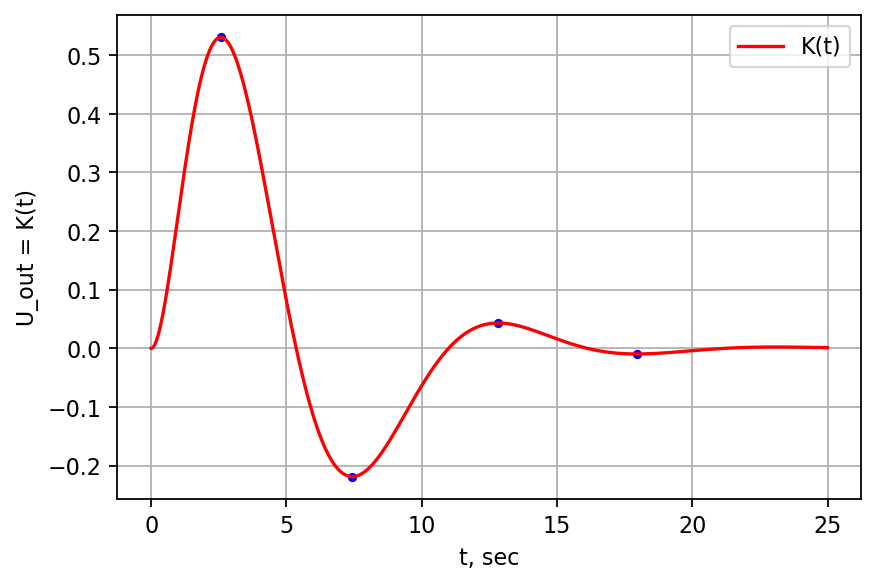

In [30]:
def signal(t, dt_i):
    if t == 0:
        sig = 1/dt_i
    else:
        sig = 0
    return sig

t = 25
data_U, data_time, data_max_min = model(t, k, T)


plt.ylabel('U_out = K(t)')
plt.xlabel('t, sec')
plt.plot(data_time, data_U, label = u'K(t)', color = 'r')
plt.scatter(data_max_min[:,0], data_max_min[:,1], color='b', s=10, marker='o')
plt.legend()
plt.grid(True)
plt.show()

Подадим на вход единичный импульс и отобразим результат на графике - переходный процесс.

t = 5.35 sec; max = 1.628
t = 10.98 sec; min = 0.891
t = 16.1 sec; max = 1.024
t = 21.2 sec; min = 0.994

sigma = 62.0 %


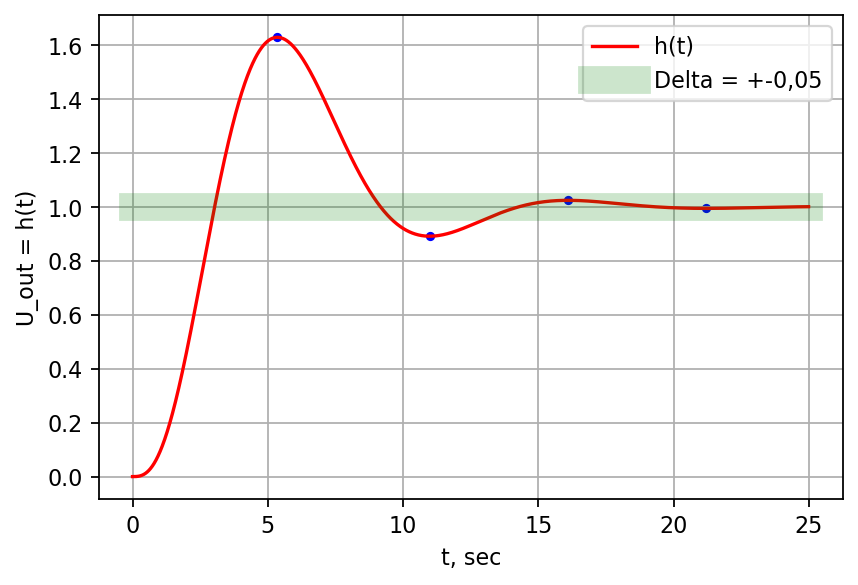

In [31]:

def signal(t, dt_i):
    sig = 0
    if t >= 0:
        sig = 1
    return sig

t = 25
data_U, data_time, data_max_min = model(t, k, T)

print('\nsigma =',(data_max_min[0][1]-1)*100//1,'%' )



plt.ylabel('U_out = h(t)')
plt.xlabel('t, sec')
plt.scatter(data_max_min[:,0], data_max_min[:,1], color='b', s=10, marker='o')
plt.plot(data_time, data_U, label = u'h(t)', color = 'r')
plt.plot([0,t],[1,1], label = u'Delta = +-0,05', alpha=.2, color = 'g', linewidth=12.5)
plt.legend()
plt.grid(True)
plt.show()

По графику переходного процесса определим характеристики переходного процесса:

Время $\tau_p$, по истечении которого регулируемая величина будет оставаться близкой к установившемуся значению с заданной точностью:

$$|h(t)-h_\text{уст}|<\Delta = 0,05;$$

$$\tau_p = 12,98\text{ сек}.$$ 

$\sigma$ перегулирование – максимальное отклонение от установившегося значения, выраженное в относительных единицах или процентах:

$$\sigma=\frac{h_\max-1}{1}\cdot100\%=62,2\%.$$

Обычно требования по перегулированию составляют $\sigma \approx10-30 \%.$

$\kappa$ - декремент затухания, равный отношению модулей двух смежных перегулирований:

$$\kappa=\frac{h_\max-h_\text{уст}}{h_\min-h_\text{уст}}=5,868.$$



Мы имеем высокое перегулирование. Попробуем подобрать оптимальные параметры форсирующего звена, чтобы уменьшить $\sigma$.

t = 20.42 sec; max = 1.044

sigma = 4.0 %


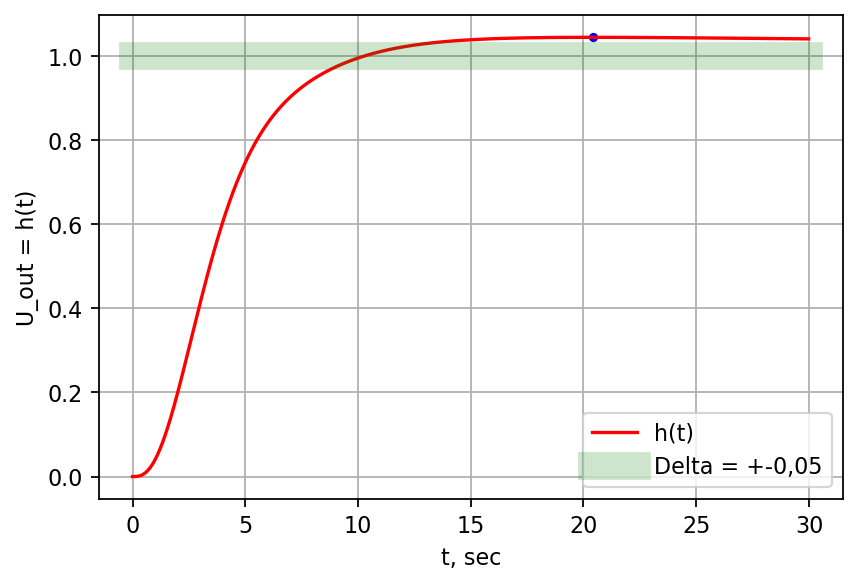

In [32]:

def signal(t, dt_i):
    sig = 0
    if t >= 0:
        sig = 1
    return sig

t = 30
var_k=0.003
var_T=80
data_U, data_time, data_max_min = model(t, var_k, var_T)

print('\nsigma =',(data_max_min[0][1]-1)*100//1,'%' )



plt.ylabel('U_out = h(t)')
plt.xlabel('t, sec')
plt.scatter(data_max_min[:,0], data_max_min[:,1], color='b', s=10, marker='o')
plt.plot(data_time, data_U, label = u'h(t)', color = 'r')
plt.plot([0,t],[1,1], label = u'Delta = +-0,05', alpha=.2, color = 'g', linewidth=12.5)
plt.legend()
plt.grid(True)
plt.show()

Из моделирования и наблюдения за поведением графиков переходного процесса в зависимости от параметров форсирующего звена получили, что меняя параметры $T$ и $k$ возможно достичь перерегулирования $\sigma = 4\%$

$$\sigma = 4\%\text{ при }T=80\text{ сек}, k=0.003\,\frac{\text{рад}}{\text{сек}^2}.$$

t = 24.82 sec; max = 1.003

sigma = 0.0 %


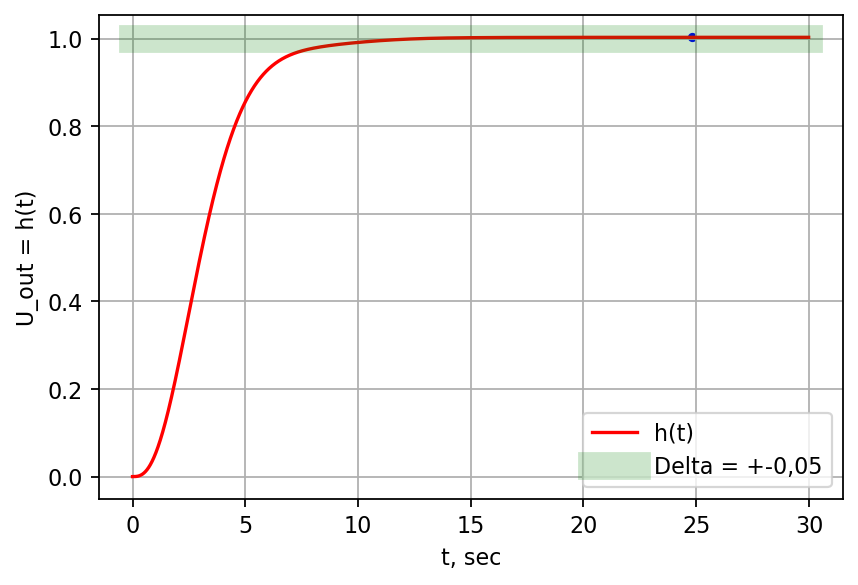

In [33]:

def signal(t, dt_i):
    sig = 0
    if t >= 0:
        sig = 1
    return sig

t = 30
var_k=0.0003
var_T=1000#9
data_U, data_time, data_max_min = model(t, var_k, var_T)

print('\nsigma =',(data_max_min[0][1]-1)*100//1,'%' )



plt.ylabel('U_out = h(t)')
plt.xlabel('t, sec')
plt.scatter(data_max_min[:,0], data_max_min[:,1], color='b', s=10, marker='o')
plt.plot(data_time, data_U, label = u'h(t)', color = 'r')
plt.plot([0,t],[1,1], label = u'Delta = +-0,05', alpha=.2, color = 'g', linewidth=12.5)
plt.legend()
plt.grid(True)
plt.show()

Также возможно достичь нулевого перерегулирования,  выбрав оптимальные параметры для форсирующего звена:

$$\sigma = 0\%\text{ при }T=1000\text{ сек}, k=0.0003\,\frac{\text{рад}}{\text{сек}^2}.$$

### Дополнительно.

Так же для аналитического расчёта переходного процесса и весовой функции, существует вторая теорема разложения Хевисайда. Подробнее можно узнать в литературе, например Клюев А.С. "Наладка средств автоматизации и автоматических систем регулирования" стр.35 __формула 1.227__.

$$\varphi(t)=\sum_{k=1}^n \sum_{j=1}^{m_k}H_{kj}t^{m_k-j}e^{p_kt},$$

где

$$H_{kj}=\frac{1}{(j-1)!(m_k-j)!}\frac{d^{j-1}}{dp^{j-1}}\left[{\frac{(p-p_k)^{m_k}U(p)}{V(p)}}\right]_{p=p_k};$$

$$V(p)=a_0(p-p_0)^{m_1}(p-p_2)^{m_2}...(p-p_n)^{m_n}.$$

Откуда $\Rightarrow$

$$K(t)=\sum_{i=1}^n\frac{U(p_i)}{V'(p_i)}e^{p_it};\qquad 
W_k(p)=\frac{U(p)}{V(p)};$$

где $n$ - число конрней, $p_i$ -  корни уравнения $V(p) = 0$.

Найдём корни:

$$V(s)=k(1+Ts)+s^2+2\xi T_\text{кст} s^3+T_\text{кст}^2s^4;$$

$$k(1+Ts)+s^2+2\xi T_\text{кст} s^3+T_\text{кст}^2s^4=0;$$

$$s_{1,2}=-0,585\pm0,295i;$$

$$s_{3,4}=-0,290\pm0,609i.$$

Тогда весовая функция будет выглядить:

$$K=2(0,402\cos(0,295t)-1,385\sin(0,295t))e^{-0,585t}
-2(0,402\cos(0,609t)-1,385\sin(0,609))e^{-0,585t};$$

Изобразим график полученной весовой функции.

In [34]:
def KK(t):
    a1 = 2*(0.402*math.cos(0.295*t)-1.385*math.sin(0.295*t))*math.exp(-0.585*t)
    a2 =-2*(0.402*math.cos(0.609*t)-0.865*math.sin(0.609*t))*math.exp(-0.29*t)
    return a1+a2
    

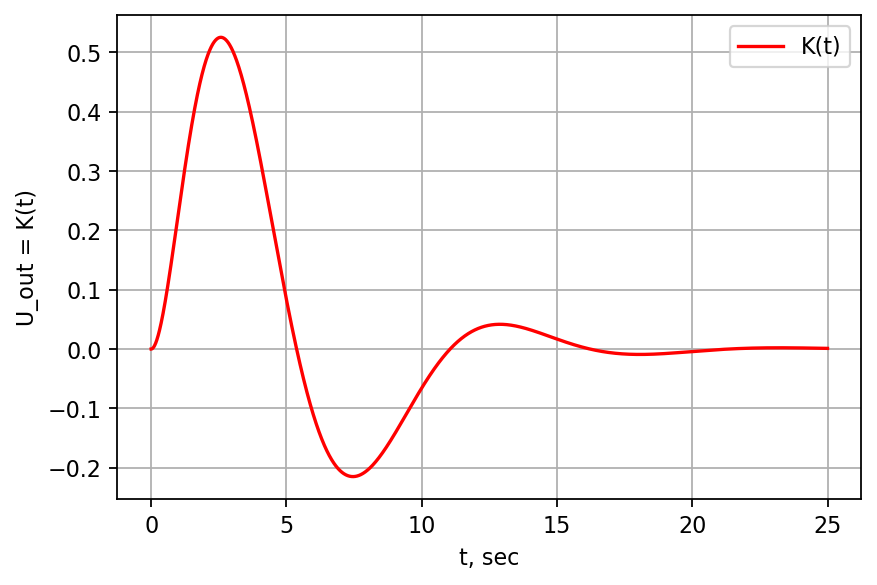

In [36]:
data_kk = []
data_time = []

t_scale = 100
t = 25
for i in range(t*t_scale):
    t_i = i/t_scale
    data_kk.append(KK(t_i))
    data_time.append(t_i)

plt.ylabel('U_out = K(t)')
plt.xlabel('t, sec')
plt.plot(data_time, data_kk, label = u'K(t)', color = 'r')
plt.legend()
plt.grid(True)
plt.show()

График весовой функции построенный из аналитических соображений в точности повторяет, нашу модель.

Аналогично получим график для переходного процесса:

$$h(t)=\frac{U(0)}{V(0)}+\sum_{i=1}^n\frac{U(s_i)}{s_iV'(s_i)}e^{s_it};$$

$$h(t)=1+2(0,402\cos(0,295t)-2,164\sin(0,295t))e^{-0,585t}-2(0,902\cos(0,609t)-1,089\sin(0,609t))e^{-0,29t}.$$

Также изобразим график $h(t)$:

In [37]:
def hh(t):
    a1 =  2*(0.402*math.cos(0.295*t)-2.164*math.sin(0.295*t))*math.exp(-0.585*t)
    a2 = -2*(0.902*math.cos(0.609*t)-1.089*math.sin(0.609*t))*math.exp(-0.29*t)
    return 1+a1+a2

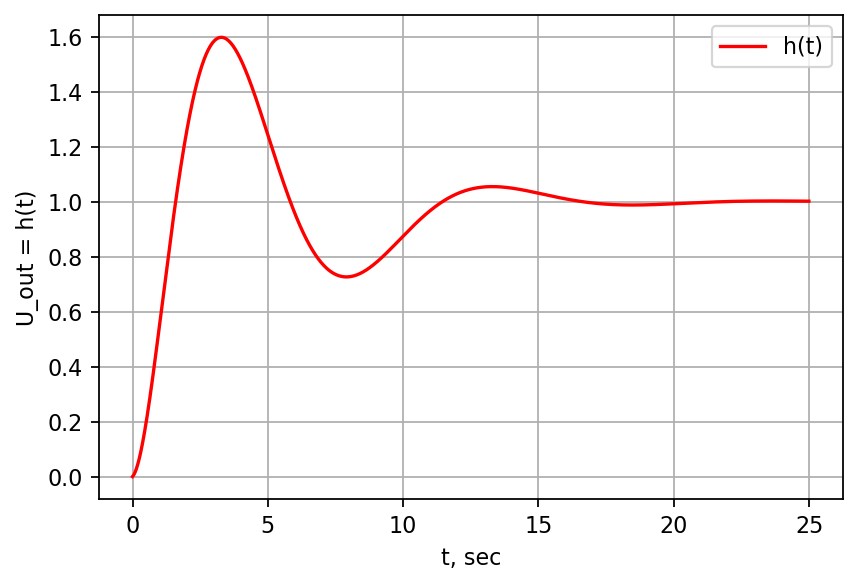

In [38]:
data_hh = []

t_scale = 100
t = 25
for i in range(t*t_scale):
    t_i = i/t_scale
    data_hh.append(hh(t_i))

plt.ylabel('U_out = h(t)')
plt.xlabel('t, sec')
plt.plot(data_time, data_hh, label = u'h(t)', color = 'r')
plt.legend()
plt.grid(True)
plt.show()

График переходного процесса построенный из аналитических соображений в точности повторяет, нашу модель.

## Вывод.

- Исследовали основные свойства и характеристики контура управления;

- Провели расчёт параметров системы:  
$$T=5T_\text{кст} =4 \text{ c};\qquad k=0,125 \,\frac{\text{рад}}{\text{сек}^2};\qquad w_\text{ср} =0,5\,\frac{\text{рад}}{\text{сек}};$$

$$\Delta\psi_\text{ку}=29,74^\circ;\qquad\Delta A_\text{з} = -11,2\text{ дБ};\qquad w_\text{эф} = 0,9112\,\frac{\text{рад}}{\text{сек}}.$$

- Выявили, что для оптимизации Показателя колебательности необходимо увеличивать параметр $k$ форсирующего звен;

- Промоделировани контур управления и на основе модели изучили весовую функцию и переходный процесс. Аналитически подвердили верность полученных данных исследования;

- Проведя анализ моделирования, выявили рекомендуемые, оптимальные параметры форсирующего звена для контура управления с заданной функцией управления:

$$\sigma = 0\%\text{ при }T=1000\text{ сек}, k=0.0003\,\frac{\text{рад}}{\text{сек}^2}.$$